In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv(r"C:\Users\KARTHIKA\Downloads\clean_resume_data.csv.zip")

In [3]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [4]:
df.shape

(2484, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [6]:
df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [7]:
df.shape

(2484, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [9]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

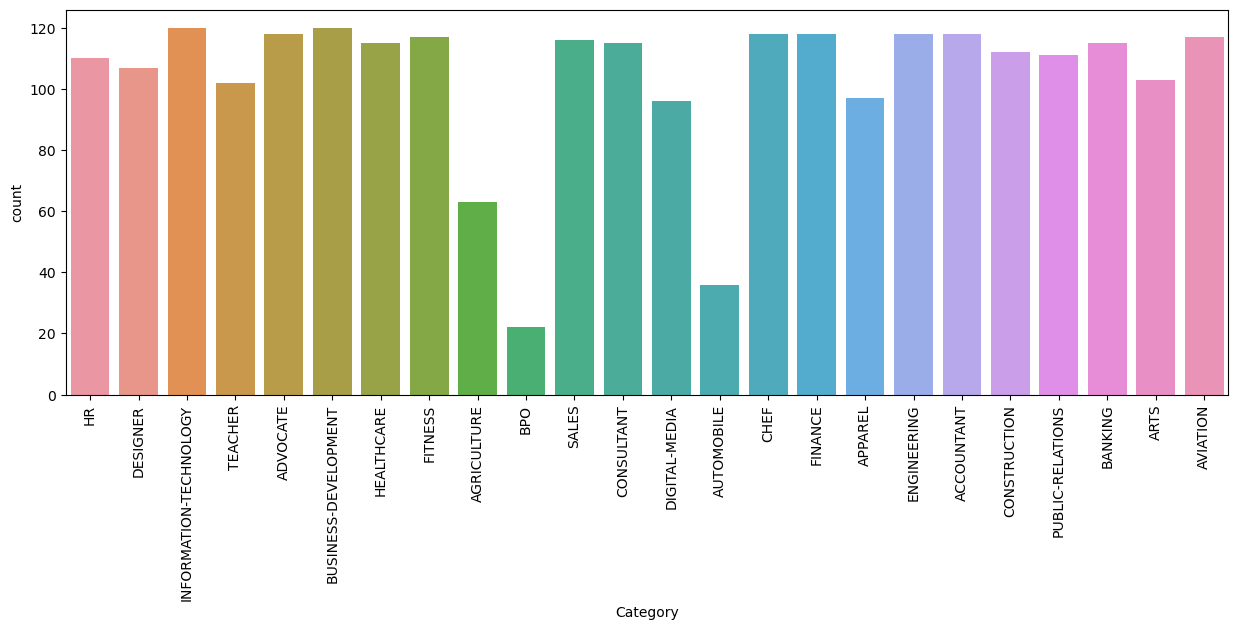

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

In [11]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
print(labels)

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


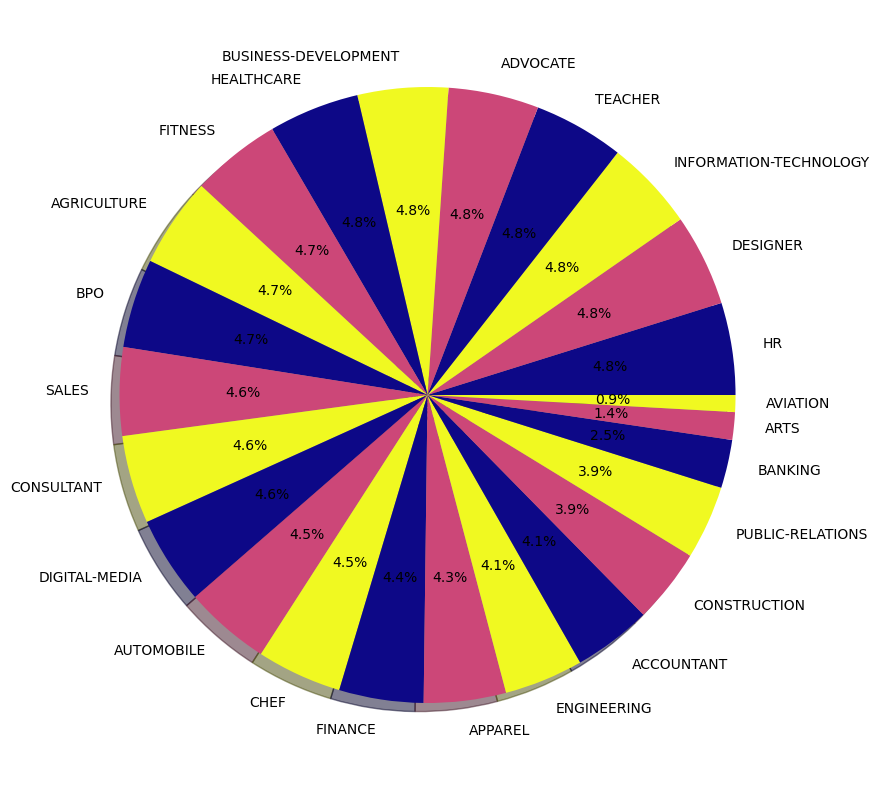

In [12]:
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [14]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)
        

In [15]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [16]:
balanced_df.dropna(inplace=True)

In [17]:
x = balanced_df['Feature']
y = balanced_df['Category']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:
x_train

228     director information technology professional p...
1557    senior finance manager summary highly driven f...
1194    consultant summary media planner media buyer r...
916     adult education teacher accomplishments cal po...
2150    banking summary high energy manager successful...
                              ...                        
1328    director executive profile forward thinker exp...
973     bpo team leader summary seeking provide top qu...
979     manager administration facilities executive su...
1027    pmc psm sales manager sales associate career f...
793     fitness specialist summary energetic personal ...
Name: Feature, Length: 2303, dtype: object

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2303,)
(576,)
(2303,)
(576,)


In [20]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [21]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_tfidf,y_train)

y_pred = rf_classifier.predict(x_test_tfidf)
print('accuracy : ',accuracy_score(y_test,y_pred))

accuracy :  0.8385416666666666


In [22]:
print('Classification report : \n',classification_report(y_test,y_pred))

Classification report : 
                         precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.90      0.86        21
              ADVOCATE       0.95      0.69      0.80        29
           AGRICULTURE       0.89      0.70      0.78        23
               APPAREL       0.89      0.81      0.85        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.83      0.97      0.89        30
               BANKING       0.95      0.78      0.86        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.48      0.61      0.54        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.89      0.96      0.92        25
            CONSULTANT       1.00      0.61      0.76        31
              DESIGNER       0.96      0.96      0.96        28
         DIGI

In [30]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  1  3  0  0  1  1]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  1  3]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  2  0]
 [ 0  1  0  0 14  0  1  0  0  0  1  0  0  0  1  0  0  1  0  0  1  0  0  2]
 [ 0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0 18  0  1  0  0  0  0  0  0  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 11  0  0  0  0  2  1  0  0  0  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 27  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  3  0  1 19  0  0  1  0  1  0  1  1  2  0  0]
 [ 0  0  0  0  0  0  1  0

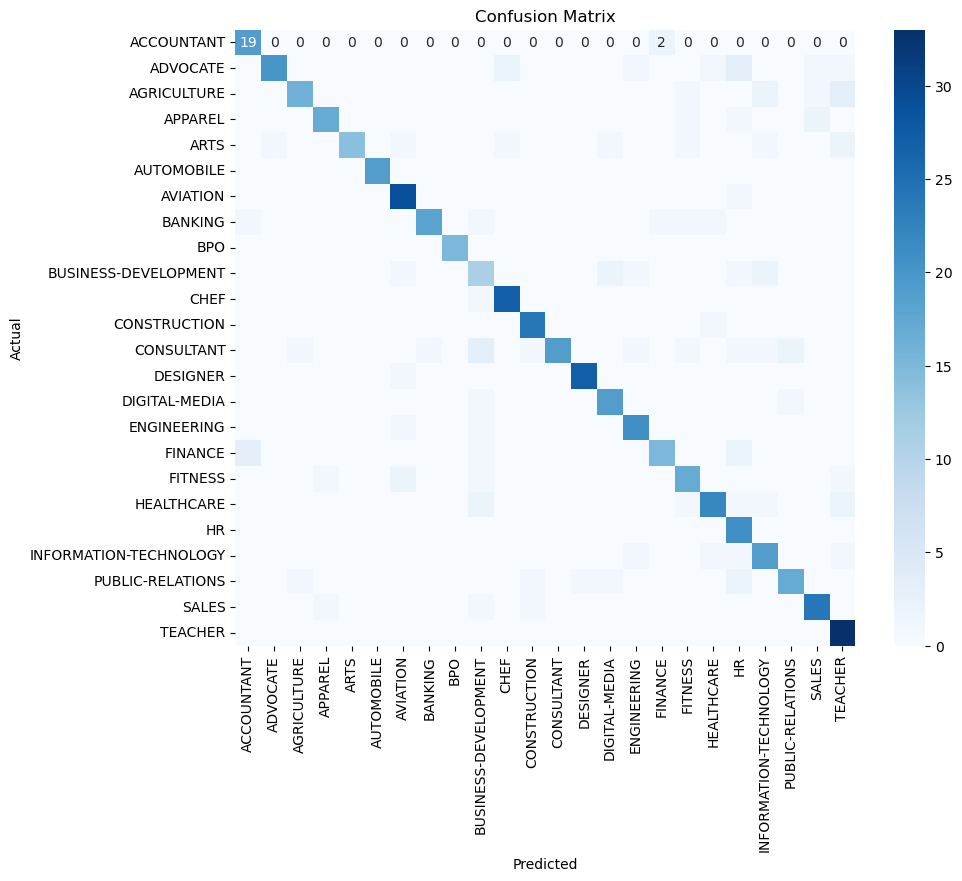

In [29]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText



def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [38]:
resume_file = """"📍 New York, USA | 📧 johndoe@example.com | 📞 +1 234-567-8901 | 🔗 LinkedIn Profile

Professional Summary
Results-driven Data Scientist with 4+ years of experience in predictive modeling, machine learning, and data analysis. Passionate about leveraging data-driven insights to solve complex business problems. Skilled in Python, SQL, and cloud-based analytics platforms.

Work Experience
Data Scientist | ABC Tech Solutions (Jan 2021 – Present)
📍 New York, USA

Developed a customer churn prediction model, reducing churn by 20%.
Built automated dashboards in Power BI to visualize sales trends.
Optimized ML models, improving prediction accuracy by 15%.
Data Analyst | XYZ Corporation (Jun 2018 – Dec 2020)
📍 San Francisco, USA

Conducted exploratory data analysis (EDA) to improve business strategies.
Improved data processing efficiency, reducing runtime by 30%.
Created SQL queries and reports to analyze customer behavior.
Education
🎓 Bachelor’s in Computer Science | University of California, Berkeley (2014 – 2018)

Skills
✔ Programming: Python, R, SQL
✔ Machine Learning: Scikit-learn, TensorFlow
✔ Data Visualization: Matplotlib, Seaborn, Power BI
✔ Cloud Platforms: AWS, Google Cloud
✔ Tools: Git, Jupyter Notebook

"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DIGITAL-MEDIA


In [39]:
resume_file="""📍 Los Angeles, USA | 📧 emily.johnson@example.com | 📞 +1 555-123-4567 | 🔗 LinkedIn Profile

Professional Summary
Passionate and dedicated High School Teacher with 6+ years of experience in designing engaging lesson plans, fostering student development, and integrating technology into the classroom. Skilled in curriculum planning, student mentorship, and classroom management.

Work Experience
Senior English Teacher | Greenfield High School (Aug 2018 – Present)
📍 Los Angeles, USA

Designed and implemented interactive lesson plans to enhance student engagement.
Increased student performance by 25% through personalized tutoring and assessments.
Integrated technology-based learning tools, improving classroom participation.
Organized literary clubs and debate competitions to enhance communication skills.
English & Social Studies Teacher | Oakwood Middle School (Jun 2016 – Jul 2018)
📍 San Francisco, USA

Taught English and Social Studies to grades 6-8, improving overall academic performance.
Developed customized teaching materials to cater to different learning styles.
Conducted parent-teacher conferences to discuss student progress.
Education
🎓 Master’s in Education (M.Ed.) | University of California, Berkeley (2016)
🎓 Bachelor’s in English Literature | University of California, Los Angeles (2014)

Teaching Skills
✔ Classroom Management
✔ Lesson Planning & Curriculum Development
✔ Student Engagement & Motivation
✔ Public Speaking & Communication
✔ Technology Integration (Google Classroom, EdTech Tools)

Certifications
🏆 Teaching License – California State Board of Education (2016)
🏆 TESOL Certification (2020)

Achievements
🏆 Awarded "Best Educator of the Year" – Greenfield High School (2021)
🏆 Successfully implemented a digital learning program that increased engagement by 30%

Extracurricular Involvement
📌 Literature Club Coordinator – Organized book discussions & creative writing workshops.
📌 Debate Coach – Trained students for inter-school debating competitions.

Languages
🇺🇸 English – Fluent
🇪🇸 Spanish – Basic

"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: TEACHER


In [35]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [36]:
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [37]:
import pickle
pickle.dump(rf_classifier,open('E:\ResumePrasingSavedModels/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('E:\ResumePrasingSavedModels/tfidf_vectorizer_categorization.pkl','wb'))